In [3]:
import torch    

a=torch.rand(3,3)
b=torch.rand(1,3)
b=b.transpose(0,1)
c=torch.mm(a,b)
print(c)

tensor([[0.5039],
        [0.6074],
        [1.2262]])


In [12]:
has_mps = torch.backends.mps.is_built()
device = "mps" if has_mps else "cuda" if torch.cuda.is_available() else "cpu"
print(device)


mps


In [17]:
a= torch.tensor((1.0),requires_grad=True)
b= torch.tensor((2.0),requires_grad=True)

x=2*a + 3*b
y = 5*a*a + 3*b*b*b
z = 2*x + 3*y
z.backward()
agrad= 4+30*a.data.item()
pgrad=a.grad.item()
print(agrad)
print(pgrad)

34.0
34.0


In [21]:
b=torch.tensor((1.0),requires_grad=True)
w=torch.tensor((2.0),requires_grad=True)
x=torch.tensor((3.0),requires_grad=True)

u=w*x
v=u+b
a=torch.relu(v)
a.backward()

pgrad=w.grad.item()
print(pgrad)

3.0


In [23]:
b=torch.tensor((1.0),requires_grad=True)
w=torch.tensor((2.0),requires_grad=True)
x=torch.tensor((3.0),requires_grad=True)

u=w*x
v=u+b
a=torch.sigmoid(v)
a.backward()
pgrad=w.grad.item()
print(pgrad)

0.0027305022813379765


### week3

w: 0.8200302720069885 b:  0.9878906011581421


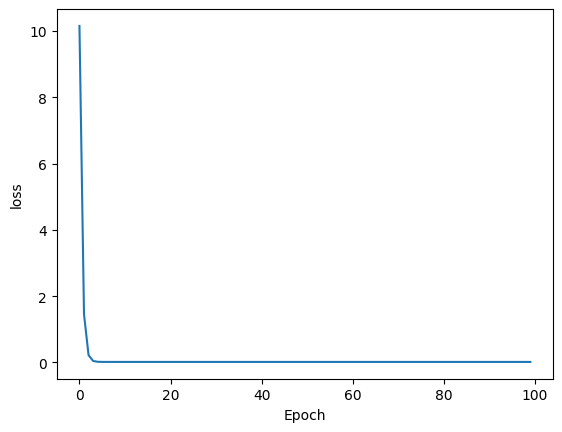

In [24]:
import matplotlib.pyplot as plt

x = torch.tensor( [12.4, 14.3, 14.5, 14.9, 16.1, 16.9, 16.5, 15.4, 17.0, 17.9, 18.8, 20.3, 22.4,
19.4, 15.5, 16.7, 17.3, 18.4, 19.2, 17.4, 19.5, 19.7, 21.2])
y = torch.tensor( [11.2, 12.5, 12.7, 13.1, 14.1, 14.8, 14.4, 13.4, 14.9, 15.6, 16.4, 17.7, 19.6,
16.9, 14.0, 14.6, 15.1, 16.1, 16.8, 15.2, 17.0, 17.2, 18.6])

w=torch.tensor(1.0,requires_grad=True)
b=torch.tensor(1.0,requires_grad=True)
lr=torch.tensor(0.001)
epochs=100
losses=[]
for epoch in range(epochs):
    y_pred=w*x + b
    loss=torch.mean((y_pred-y)**2)
    loss.backward()

    with torch.no_grad():
        w-=lr*w.grad
        b-=lr*b.grad
    w.grad.zero_()
    b.grad.zero_()
    
    losses.append(loss.item())
print("w:",w.item(), "b: ", b.item())
plt.plot(range(epochs),losses)
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.show()

In [27]:
x=torch.tensor([2,4],dtype=torch.float32)
y=torch.tensor([20,40],dtype=torch.float32)
w=torch.tensor(1.0,requires_grad=True)
b=torch.tensor(1.0,requires_grad=True)
lr=0.001
n=len(x)
for epoch in range(2):
    y_pred=w*x+b
    loss=torch.mean((y_pred-y)**2)
    loss.backward()
    wgan=torch.mean(2*x*(y_pred-y))
    bgan=torch.mean(2*(y_pred-y))
    with torch.no_grad():
        w-=lr*wgan
        b-=lr*bgan
    w.grad.zero_()
    b.grad.zero_()
print(wgan)
print(bgan)
print("updated")
print(w.item())
print(b.item())
    


tensor(-170.2080, grad_fn=<MeanBackward0>)
tensor(-50.8520, grad_fn=<MeanBackward0>)
updated
1.344208002090454
1.1028521060943604


after100 epoches, parameters of w=tensor([1.0239], requires_grad=True) and b=tensor([0.3780], requires_grad=True) and loss=326.09417724609375
after100 epoches, parameters of w=tensor([1.2807], requires_grad=True) and b=tensor([0.4003], requires_grad=True) and loss=319.43603515625
after100 epoches, parameters of w=tensor([1.5330], requires_grad=True) and b=tensor([0.4223], requires_grad=True) and loss=313.0028991699219
after100 epoches, parameters of w=tensor([1.7796], requires_grad=True) and b=tensor([0.4443], requires_grad=True) and loss=306.84722900390625
after100 epoches, parameters of w=tensor([2.0192], requires_grad=True) and b=tensor([0.4659], requires_grad=True) and loss=301.03033447265625
after100 epoches, parameters of w=tensor([2.2503], requires_grad=True) and b=tensor([0.4871], requires_grad=True) and loss=295.61480712890625
after100 epoches, parameters of w=tensor([2.4713], requires_grad=True) and b=tensor([0.5079], requires_grad=True) and loss=290.6499938964844
after100 ep

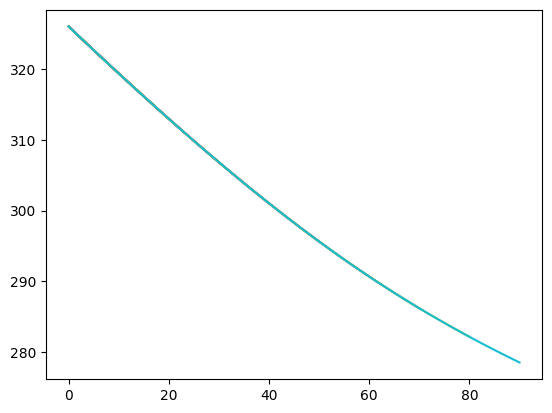

In [29]:
x = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0])
y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0])
learning_rate = torch.tensor(0.001)

class rml:
    def __init__(self):
        self.w=torch.rand([1],requires_grad=True)
        self.b=torch.rand([1],requires_grad=True)
    def forward(self,x):
        return self.w*x+self.b
    def update(self):
        self.w-=lr*self.w.grad
        self.b-=lr*self.b.grad
    def reset(self):
        self.w.grad.zero_()
        self.b.grad.zero_()
def criterion(yj,y_p):
    return (yj-y_p)**2

model=rml()
losses=[]

for epoch in range(100):
    loss=0
    for j in range(len(x)):
        y_p=model.forward(x)
        loss+=torch.norm(y[j]-y_p)
    loss=loss/len(x)
    losses.append(loss.item())
    loss.backward()

    with torch.no_grad():
        model.update()
        model.reset()
        if epoch%10==0:
            print("after{} epoches, parameters of w={} and b={} and loss={}".format(epochs,model.w,model.b,loss.item()))
            plt.plot(losses)

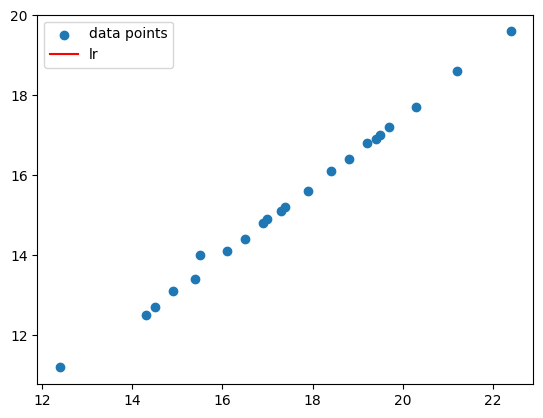

In [34]:
import torch.nn as nn
import torch.optim as optim
x = torch.tensor([12.4, 14.3, 14.5, 14.9, 16.1, 16.9, 16.5, 15.4, 17.0, 17.9, 18.8, 20.3, 22.4, 19.4, 15.5, 17.3, 18.4, 19.2, 17.4, 19.5, 19.7, 21.2], dtype=torch.float32).view(-1, 1)
y = torch.tensor([11.2, 12.5, 12.7, 13.1, 14.1, 14.8, 14.4, 13.4, 14.9, 15.6, 16.4, 17.7, 19.6, 16.9, 14.0, 15.1, 16.1, 16.8, 15.2, 17.0, 17.2, 18.6], dtype=torch.float32).view(-1, 1)

class lml(nn.Module):
    def __init__(self):
        super(lml, self).__init__()
        self.linear=nn.Linear(1,1)
    
    def forward(self,x):
        return self.linear(x)

model=lml()
criterion=nn.MSELoss()
optimiser=optim.SGD(model.parameters(),lr=0.01)

for epoch in range(1000):
    outputs=model(x)
    loss=criterion(outputs,y)
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()
plt.scatter(x.numpy(),y.numpy(), label='data points')
plt.plot(x.numpy(),outputs.detach().numpy(),color='red',label='lr')
plt.legend()
plt.show()

In [50]:
import torch.nn as nn
import torch.optim as optim
subject = [1, 2, 3, 4, 5]
x1 = [3, 4, 5, 6, 2]
x2 = [8, 5, 7, 3, 1]
y = [-3.7, 3.5, 2.5, 11.5, 5.7]

subject=torch.tensor(subject,dtype=torch.float32).view(-1,1)
x1=torch.tensor(x1,dtype=torch.float32).view(-1,1)
x2=torch.tensor(x2,dtype=torch.float32).view(-1,1)
y=torch.tensor(y,dtype=torch.float32).view(-1,1)
X=torch.cat((subject,x1,x2),1)

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(3, 1)

    def forward(self, x):
        return self.linear(x)

# Instantiate the model, loss function, and optimizer
model = LinearRegressionModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training the model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Verify the answer for the data point x1=3, x2=2
test_data = torch.tensor([3, 3, 2], dtype=torch.float32).view(1, -1)
predicted_value = model(test_data)
print("Predicted value:", predicted_value.item())

Predicted value: 5.788327217102051


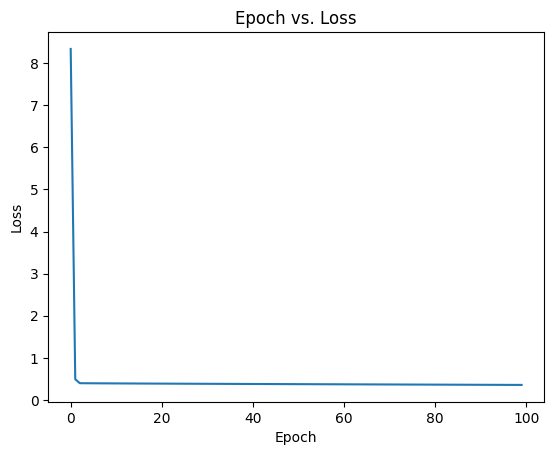

0.6291040182113647
1


In [48]:
#q7
x = torch.tensor([1, 5, 10, 10, 25, 50, 70, 75, 100], dtype=torch.float32).view(-1, 1)
y = torch.tensor([0, 0, 0, 0, 0, 1, 1, 1, 1], dtype=torch.float32).view(-1, 1)

# Logistic regression model
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

# Model, loss function, and optimizer
model = LogisticRegression()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
epochs = 100
losses = []

for epoch in range(epochs):
    # Forward pass
    y_pred = model(x)

    # Calculate loss
    loss = criterion(y_pred, y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Save loss for plotting
    losses.append(loss.item())

# Plotting
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs. Loss')
plt.show()

with torch.no_grad():
    test=torch.tensor([30],dtype=torch.float32).view(-1,1)
    pred_prob=model(test).item()
    pred_class=1 if pred_prob>0.5 else 0
    print(pred_prob)
    print(pred_class)

### week4

In [60]:

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transform
from torchvision.transforms import ToTensor
import torchvision.datasets as datasets
from torch.utils.data import Dataset,DataLoader

def generateGaussian(tindx):
    return torch.normal(tindx[0], tindx[1], (1,42,42)) 

class CNNClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(nn.Conv2d(1,16,kernel_size = 3, stride=2, padding = 2),
                                 nn.ReLU(),
                                 nn.MaxPool2d((2,2),stride=2),
                                 nn.Conv2d(16,32,kernel_size = 3, stride=1, padding = 0),
                                 nn.ReLU(),
                                 nn.MaxPool2d((2,2),stride=2),
                                 nn.Conv2d(32,4,kernel_size = 3, stride=2, padding = 2),
                                 nn.ReLU(),
                                 nn.MaxPool2d((2,2),stride=2),
                                )
        self.classification_head = nn.Sequential(nn.Linear(4,20,bias=True),
                                                 nn.ReLU(),
                                                 nn.Linear(20,2,bias=True),)
        
    def forward(self,x):
        batch_size = x.size(0)  
        features = self.net(x)
        return self.classification_head(features.view(batch_size, -1))

def generateGaussian(tindx):
    return torch.normal(tindx[0], tindx[1], (1,42,42))

class MyDataSet(Dataset):
    def __init__ (self,n):
        classes = {0: (0.5,2), 1:(1,2.5)}
        self.Y = [torch.round(torch.rand(1))[0].long() for i in range(n)]
        self.X = [generateGaussian(classes[self.Y[i].item()]) for i in range(n)]
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self,idx):
        return self.X[idx].to(device), self.Y[idx].to(device)

test_data = MyDataSet(1000)
train_loader = DataLoader(test_data,batch_size=4,shuffle=True)
test_data = MyDataSet(200)
test_loader = DataLoader(test_data,batch_size=4,shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNClassifier().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
batch_size=50

total_params = 0
for name,param in model.named_parameters():
    params = param.numel()
    total_params += params

for epoch in range(6):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:  
            print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print(f"Finished Training. Final loss = {loss.item()}, Total params = {total_params}")

correct,total = 0,0
for i,vdata in enumerate(test_loader):
    tinputs,tlabels = vdata[0].to(device), vdata[1].to(device)
    toutputs = model(tinputs)

    _,predicted = torch.max(toutputs,1)
    total += tlabels.size(0)
    correct += (predicted==tlabels).sum()
        
print(f"Correct = {correct}, Total = {total}")

[1,   100] loss: 0.656
[1,   200] loss: 0.611
[2,   100] loss: 0.389
[2,   200] loss: 0.234
[3,   100] loss: 0.168
[3,   200] loss: 0.148
[4,   100] loss: 0.136
[4,   200] loss: 0.046
[5,   100] loss: 0.050
[5,   200] loss: 0.058
[6,   100] loss: 0.015
[6,   200] loss: 0.061
Finished Training. Final loss = 0.0015486555639654398, Total params = 6098
Correct = 196, Total = 200
